# SyriaTel Customer Churn Classifier

### Overview
Customer acquisition is very costly to businesses, especially in the telecom industry, therefore customer retention is paramount for a business to be successful. Finding ways to retain existing customers is more cost effective than acquiring new customers. This project aims to build a classification model that will predict whether a customer will soon stop doing business with SyriaTel, and suggest measures to reduce customer churn rate.

By developing multiple classification models, Syriatel will be able to determine the factors that increase customer churn rate and proactively employ methods that will improve customer retention.

### Problem Statement

This project aims to conduct a thorough analysis of the SyriaTel customer churn data, utilizing multiple classification modeling techniques. The primary goal is to uncover insights into the factors influencing customer churn for SyriaTel, and suggest proactive measures to reduce the churn rate.


### Stake Holders

This project targets a diverse audience:

- **SyriaTel**: SyriaTel's gain is to increase revenue by reducing customer churn rate, which in turn lowers customer acquisition cost. The marketting team can specifically target these customers.

- **Third-party Consultants**:  Companies and consultants seeking data-driven insights into customer retention in the Telecommunication industry can utilize these classification models.

## Objectives:

1. **Assess the Factors/Features Impacting Customer Churn the Most:**
   - Analyze the Syritel churn data and determine the features that impact customer churn rate the most. These will provide measures that Syritel can implement proactively to improve customer retention.
2. **Suggest Proactive Measures to Reduce Customer Churn Rate:**
   - Suggest proactive measures by assessing the features that make customers likely to stop doing business with SyriaTel, the company can then target these customers with these measures and improve retention.

3. **Develop a Classification Model to Predict SyriaTel's Customer Churn:**
   - Build and evaluate multiple classification models using the best features to predict when a customer will likely stop doing business with SyriaTel. Provide stakeholders with a predictive tool for estimating customer churn at Syriatel.

## Business Understanding
This project addresses the core business issue of customer retention in a telecom company. Key stakeholders such as telecom companies and consultants are focused on gaining insights into the factors that influence customer churn rate, enabling them to make pro-active, data-driven decisions to improve customer satisfaction.

## Data Understanding
I've used the SyriaTel Customer Churn Dataset. The data represents details about SyriTel's customers and sets the churn feature to true or false. Through analysis of the other features, we'll gain insight into what affects the churn column/feature. 



### Exploratory Data Analysis

#### Library Imports

In [549]:
#import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Load the SyriaTel customer churn data

In [550]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('./data/SyriaTel_Customer_Churn_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Column/Feature Description

In [551]:
# Read the columns in the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Summary of Features/Columns in the SyriaTel Customer Churn Datset
* **state:** the state the customer lives in
* **account length:** the number of days the customer has had an account
* **area code:** the area code of the customer
* **phone number:** the phone number of the customer
* **international plan:** true if the customer has the international plan, otherwise false
* **voice mail plan:** true if the customer has the voice mail plan, otherwise false
* **number vmail messages:** the number of voicemails the customer has sent
* **total day minutes:** total number of minutes the customer has been in calls during the day
* **total day calls:** total number of calls the user has done during the day
* **total day charge:** total amount of money the customer was charged by the Telecom company for calls during the day
* **total eve minutes:** total number of minutes the customer has been in calls during the evening
* **total eve calls:** total number of calls the customer has done during the evening
* **total eve charge:** total amount of money the customer was charged by the Telecom company for calls during the evening
* **total night minutes:** total number of minutes the customer has been in calls during the night
* **total night calls:** total number of calls the customer has done during the night
* **total night charge:** total amount of money the customer was charged by the Telecom company for calls during the night
* **total intl minutes:** total number of minutes the user has been in international calls
* **total intl calls:** total number of international calls the customer has done
* **total intl charge:** total amount of money the customer was charged by the Telecom company for international calls
* **customer service calls:** number of calls the customer has made to customer service
* **churn:** true if the customer terminated their contract, otherwise false

In [552]:
# Gets the number of rows and columns in the dataset
df.shape

(3333, 21)

Dataset has 3333 rows and 21 columns

Check the data type held by each column and number of non-null values

In [553]:
# Check the data type held by each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no null values in this dataset. Check for row duplicates below:

In [554]:
# Checks for row duplicates
df.duplicated().sum()

0

### Feature Selection

For feature selection, I'll first divide the dataset features into continous and categorical features.

In [555]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* churn
* state
* area code
* international plan
* voicemail plan

In [556]:
# Create numeric & categorical lists
numerical_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categorical_cols = ['state', 'area code','international plan','voice mail plan']

Phone number is a unique value for all customers and won't add any value to the analysis, so drop that feature.

In [557]:
df.drop(['phone number'], inplace=True, axis=1)

#### Categorical Features Analysis

#### Analysis 1: Explore the Impact of Categorical Features on Customer Churn:

This section analyzes the impact of the categorical features(state, area code, international plan, voicemail plan) on the target feature (churn).

In [558]:
# Check the distribution of values in the categorical features
for col in categorical_cols:
    if col == 'state':
         continue
    print(df[col].value_counts(normalize='index'))

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64
no     0.90309
yes    0.09691
Name: international plan, dtype: float64
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


In [559]:
# Checks the distribution of customer churn in the categoric features.
for col in categorical_cols:
    if col == 'state':
         continue
    crosstab = pd.crosstab(df[col], df['churn'], normalize="index")
    print(f"Distribution for {col}:")
    print(crosstab)
    print("\n")
state_crosstab = pd.crosstab(df['state'], df['churn'], normalize="index")
print(f"Distribution for State:")
print(state_crosstab)

Distribution for area code:
churn         False     True 
area code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


Distribution for international plan:
churn                  False     True 
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149


Distribution for voice mail plan:
churn               False     True 
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768


Distribution for State:
churn     False     True 
state                    
AK     0.942308  0.057692
AL     0.900000  0.100000
AR     0.800000  0.200000
AZ     0.937500  0.062500
CA     0.735294  0.264706
CO     0.863636  0.136364
CT     0.837838  0.162162
DC     0.907407  0.092593
DE     0.852459  0.147541
FL     0.873016  0.126984
GA     0.851852  0.148148
HI     0.943396  0.056604
IA     0.931818  0.068182
ID     0.876712  0.123288
IL   

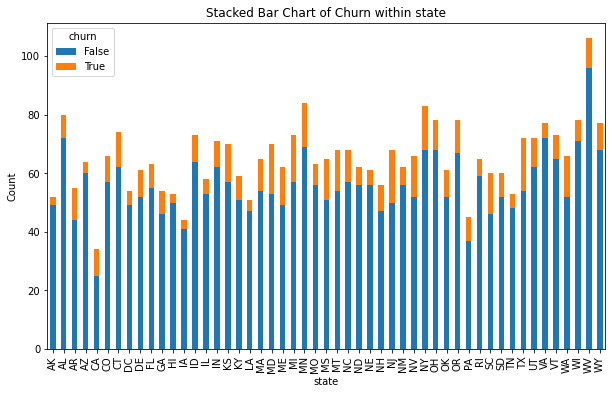

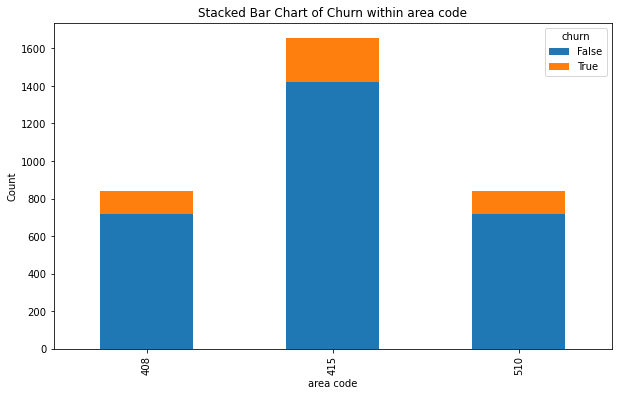

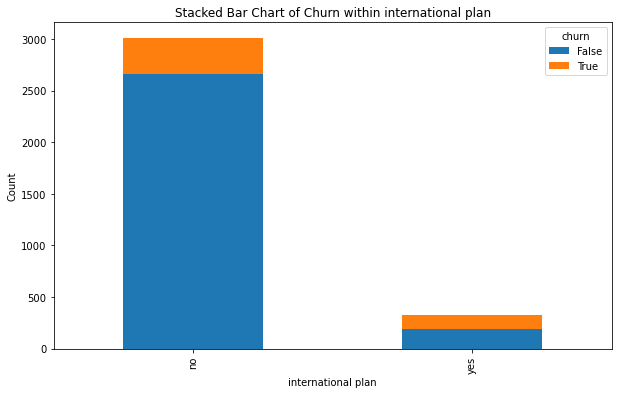

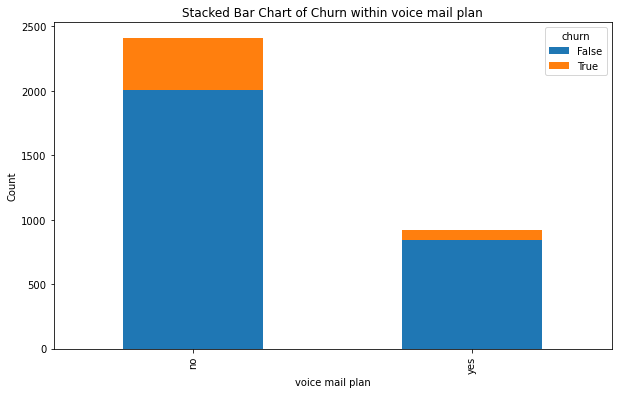

In [560]:
# Visualization of customer churn in each categoric feature
for col in categorical_cols:
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart of Churn within {col}')
    plt.ylabel('Count')
    plt.show()

**Observation:**

 From the visualizations above, 42% of the customers with an international plan left SyriaTel in comparison to 11% of those that don't have an international plan. Syriatel should focus on boosting international calls to improve customer satisfaction for those with international plans.

The customer churn for those without a voice mail plan is higher than the customers with a plan, at 16% versus 8%. There is no impact of area codes on customer churn, though 50% of the data is from Area code 415.

#### Numeric Features Analysis

#### Analysis 2: Explore the Impact of Numeric Features on Customer Churn:

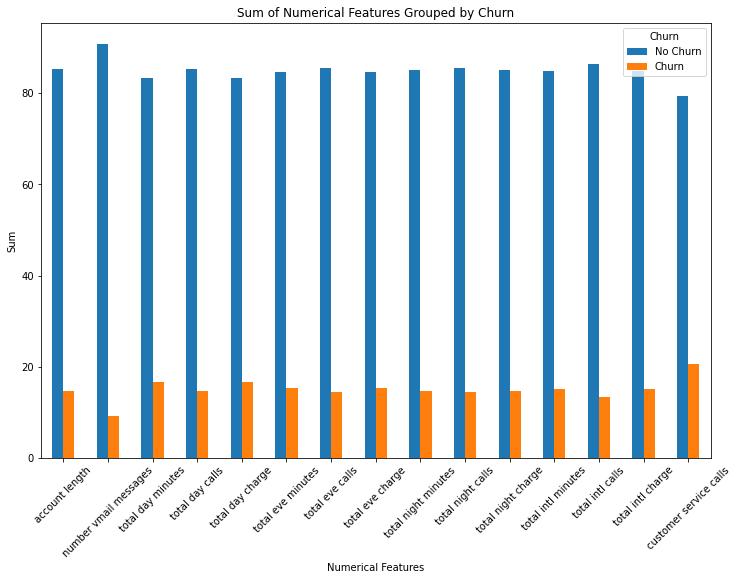

Percentage distribution of numerical columns grouped by churn:
       account length  number vmail messages  total day minutes  \
churn                                                             
False       85.279161              90.846114          83.320911   
True        14.720839               9.153886          16.679089   

       total day calls  total day charge  total eve minutes  total eve calls  \
churn                                                                          
False        85.378728         83.320956          84.684419        85.443882   
True         14.621272         16.679044          15.315581        14.556118   

       total eve charge  total night minutes  total night calls  \
churn                                                             
False         84.684517            85.194035          85.466299   
True          15.315483            14.805965          14.533701   

       total night charge  total intl minutes  total intl calls  \
churn      

In [561]:

import matplotlib.pyplot as plt
summed_data = df.groupby('churn')[numerical_cols].sum()
percentage_data = summed_data.div(summed_data.sum(axis=0), axis=1) * 100
percentage_data.T.plot(kind='bar', figsize=(12, 8))
plt.title('Sum of Numerical Features Grouped by Churn')
plt.ylabel('Sum')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()
print("Percentage distribution of numerical columns grouped by churn:")
print(percentage_data)

**Observation:**

From the chart above, the most significant numeric value on customer churn is customer service calls. Customers with more service call are more likely to discontinue their service with SyriaTel.

### Correlation Heatmap for Numeric Features

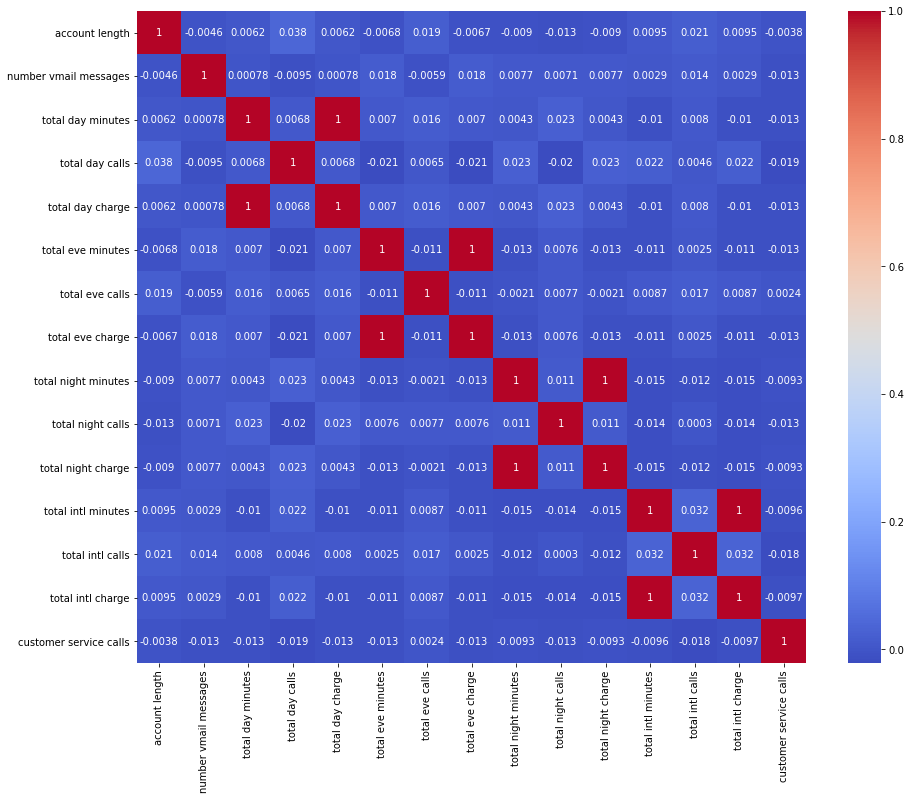

In [562]:

plt.subplots(figsize=(15,12))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

Some of the numeric features have perfect correlation since the values in one column are derived from the other column:

* Total day charge and total day minutes.
* Total eve charge and total eve minutes.
* Total night charge and total night minutes. 
* Total intl charge and total intl minutes. 

I'll drop the columns with minutes and remain with the columns with charges.

In [563]:
df.drop(['total intl minutes', 'total eve minutes', 'total night minutes', 'total day minutes'], axis=1, inplace=True)
df.shape

(3333, 16)

### Train-Test Split 

In [564]:
# Split the data into training and testing data at 80,20 ratio
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Preprocessing

I've used onehotencoder to convert each categorical value into a new binary column with 0 or 1 for each unique value.

In [565]:
X_train_categorical = X_train[['state','area code','international plan','voice mail plan']]
X_test_categorical = X_test[['state','area code','international plan','voice mail plan']]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train_categorical)
def oheEncoder(X_categorical):
    # Create new column names with prefixes
    new_column_names = []
    for col, categories in zip(X_categorical.columns, ohe.categories_):
        new_column_names.extend([f"{col}_{category}" for category in categories])

    # Create the DataFrame with the new column names
    X_ohe = pd.DataFrame(
        ohe.transform(X_categorical),
        index=X_categorical.index,
        columns=new_column_names
    )
    return X_ohe
X_train_ohe = oheEncoder(X_train_categorical)
X_test_ohe = oheEncoder(X_test_categorical)
X_train_ohe

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Normalization

In [566]:
X_train_numeric = X_train.drop(['state','area code','international plan','voice mail plan'], axis=1)
X_test_numeric = X_test.drop(['state','area code','international plan','voice mail plan'], axis=1)
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
def minmax_scaler(X_numeric):    
    X_scaled = pd.DataFrame(
        scaler.transform(X_numeric),
        # index is important to ensure we can concatenate with other columns
        index=X_numeric.index,
        columns=X_numeric.columns
    )
    return X_scaled
X_train_scaled = minmax_scaler(X_train_numeric)
X_test_scaled = minmax_scaler(X_test_numeric)
X_test_scaled

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
438,0.462810,0.000000,0.466667,0.437669,0.623529,0.909091,0.633803,0.447101,0.157895,0.675926,0.111111
2674,0.272727,0.000000,0.644444,0.305912,0.729412,0.597865,0.760563,0.444710,0.315789,0.640741,0.000000
1345,0.400826,0.000000,-0.222222,-0.007432,0.764706,0.439016,0.387324,0.387328,0.052632,0.340741,0.444444
1957,0.603306,0.000000,0.362963,0.603716,0.535294,0.561307,0.563380,0.358039,0.105263,0.509259,0.111111
2148,0.392562,0.000000,0.533333,0.406081,0.429412,0.617923,0.408451,0.550508,0.368421,0.500000,0.111111
...,...,...,...,...,...,...,...,...,...,...,...
2577,0.644628,0.000000,0.459259,0.524155,0.500000,0.585895,0.366197,0.465033,0.263158,0.425926,0.222222
2763,0.475207,0.372549,0.548148,0.439696,0.694118,0.509867,0.584507,0.456067,0.105263,0.409259,0.333333
3069,0.607438,0.509804,0.451852,0.448311,0.747059,0.441281,0.387324,0.524806,0.157895,0.494444,0.111111
1468,0.305785,0.529412,0.533333,0.330068,0.747059,0.568748,0.570423,0.460849,0.368421,0.209259,0.333333


In [567]:
# Join the numeric and categorical features to one dataframe.
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)

### Addressing Class Imbalance

The binary classes in the target feature (churn) are not evenly distributed as illustrated below.

0    0.855086
1    0.144914
Name: churn, dtype: float64


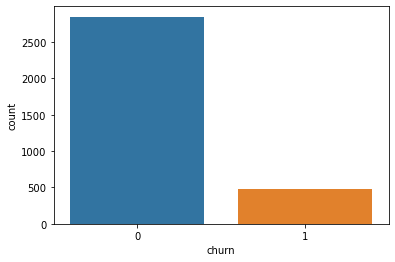

In [568]:
# Countplot of churn feature
print(df.churn.value_counts(normalize=True))
sns.countplot(data=df, x='churn')
plt.show()

* 14.5% of the data in the churn feature is true, this shows class imbalance which I will address using SMOTE, an oversampling technique.

1    0.5
0    0.5
Name: churn, dtype: float64


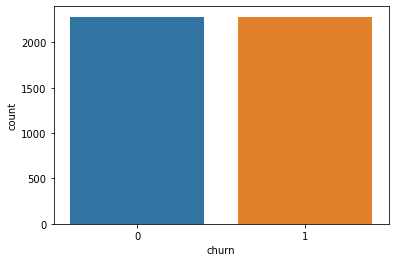

In [569]:
smote = SMOTE()
X_train_full.columns = [str(col) for col in X_train_full.columns]
y_train.name = 'churn'
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)
print(y_train_resampled.value_counts(normalize=True))
sns.countplot(data=y_train_resampled, x=y_train_resampled)
plt.show()


## Modelling
***
### Model 1 : Logistic Regression Classifier

* Logistic Regression is a type of classification algorithm under supervised machine learning that predicts the probability of a classification outcome based on one or more predictor variables.In this project, the target variable(churn) is binary, either true or false.
* This will serve as the base model.



In [570]:
# Create a LogisticRegression object, fit the data and predict the target variable
log_reg = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_reg.predict(X_test_full)

#### Model Evaluation

In [571]:
print(classification_report(y_test, y_pred_log, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.95      0.79      0.86       566
        True       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



Accuracy score for testing set:  0.784
F1 score for testing set:  0.52
Recall score for testing set:  0.772
Precision score for testing set:  0.392


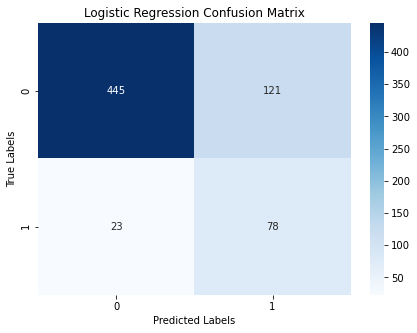

In [572]:

print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_log),3))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_log),3))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_log),3))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_log),3))
cm_lr = confusion_matrix(y_test, y_pred_log)
f, ax= plt.subplots(1,1,figsize=(7,5))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

#### Observations

* **Accuracy:** The model correctly predicted 78.7% of the instances in the testing set. This is a decent overall performance.
* **F1-score:** The F1-score of 0.52 indicates a moderate balance between precision and recall. It's lower than the accuracy, suggesting there might be some trade-off between these two metrics.
* **Recall:** The high recall of 0.762 means the model is good at identifying most of the positive instances, but it might also incorrectly classify some negative instances as positive.
* **Precision:** The low precision of 0.395 suggests that the model incorrectly classifies many negative instances as positive, as shown by the low pecision score on the True(1) class.

#### Conclusion

* Recall is the most significant metric, since the goal is to identify customers about to leave and implement proactive measures to prevent that. Precision is also important to ensure that retention efforts are not wasted on customers unlikely to churn.
* This model wouldn't be ideal to predict customer churn.

***
### Model 2 : Decision Trees Classifier

* Decision tree classifier is a supervised machine learning algorithm that works by splitting the data into subsets based on the value of input features.
* Each node represents a decision rule, and each branch represents an outcome of that rule.

In [573]:
# Create a DecisionTreeClassifier object, fit the data and predict the target variable
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled,y_train_resampled)
y_pred_dt = decision_tree.predict(X_test_full)

#### Model Evaluation

In [574]:
print(classification_report(y_test, y_pred_dt, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.95      0.90      0.92       566
        True       0.56      0.75      0.64       101

    accuracy                           0.87       667
   macro avg       0.76      0.82      0.78       667
weighted avg       0.89      0.87      0.88       667



Accuracy score for testing set:  0.874
F1 score for testing set:  0.644
Recall score for testing set:  0.752
Precision score for testing set:  0.563


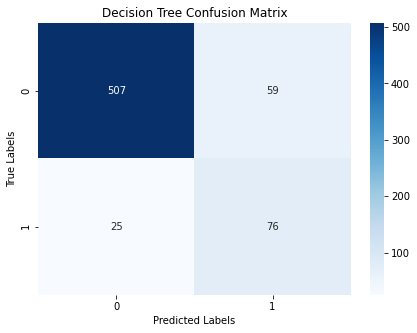

In [575]:

print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),3))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),3))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),3))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),3))
cm_lr = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(7,5))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

#### Observations

* **Accuracy:** The model correctly predicted 85% of the instances in the testing set. This is a good overall performance, and improved compared to logistic regression model.
* **F1-score:** The F1-score of 0.603 indicates a moderate balance between precision and recall. It's lower than the accuracy, suggesting there might be some trade-off between these two metrics.
* **Recall:** The high recall of 0.752 means the model is good at identifying most of the positive instances, but it might also incorrectly classify some negative instances as positive.
* **Precision:** The improved precision score of 0.503 is moderate, indicating that while the model is good at identifying positive instances, it might also incorrectly classify some negative instances as positive.

#### Conclusion

* Overall performance of the decision tree model has improved compared to logistic regression.
* With a precision score of 0.503 and recall of 0.752, the model is still struggling to identify positive instances of the churn feature, customers who have left the business.

***
### Model 3 : Random Forest Classifier
* Random forest is a supervised machine learning algorithm that creates a set of decision trees from a randomly selected subset of the training data.
* Random forest is best suited for handling large, complex datasets and providing insight into feature importance.


In [576]:
# Create a DecisionTreeClassifier object, fit the data and predict the target variable
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf_model.predict(X_test_full)

#### Model Evaluation

In [577]:
print(classification_report(y_test, y_pred_rf, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.81      0.72      0.76       101

    accuracy                           0.93       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



Accuracy score for testing set:  0.933
F1 score for testing set:  0.764
Recall score for testing set:  0.723
Precision score for testing set:  0.811


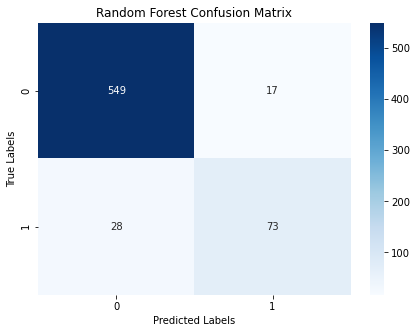

In [578]:

print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),3))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),3))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),3))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),3))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(7,5))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

#### Observations

* **Accuracy:** The model correctly predicted 93.1% of the instances in the testing set, which is an excellent overall performance, and an improvement compared to the Decision Tree model.
* **F1-score:** The F1-score of 0.76 indicates a good balance between precision and recall. It's lower than the accuracy, suggesting there might be some trade-off between these two metrics.
* **Recall:** The recall of 0.723 is moderate, meaning the model might miss some positive instances. This is a slight decline compared to Decision tree.
* **Precision:** The precision score of 0.802 is significantly improved, but still indicates that the model might incorrectly classify some negative instances as positive.

#### Hyperparameter Tuning of Random Forest Classifier
* Classifier models can be optimized by tweaking the classifier's parameters. To improve the performance of the random forest classifier, I've changed some parameters.

In [579]:
rf_model_tuned = RandomForestClassifier(criterion='entropy', random_state=42, class_weight='balanced')
rf_model_tuned.fit(X_train_resampled,y_train_resampled)
y_pred_tuned = rf_model_tuned.predict(X_test_full)

Accuracy score for testing set:  0.927
F1 score for testing set:  0.751
Recall score for testing set:  0.733
Precision score for testing set:  0.771


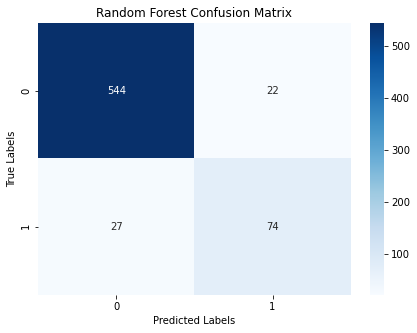

In [580]:

print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_tuned),3))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_tuned),3))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_tuned),3))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_tuned),3))
cm_rf = confusion_matrix(y_test, y_pred_tuned)
f, ax= plt.subplots(1,1,figsize=(7,5))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

#### Observations

One of the most important parameters to improve precision score is class_weight, which addresses class imbalance. 

* **Accuracy:** The model's accuracy has improved to 93.7%.
* **F1-score:** The model's F1-Score has improved to 0.784.
* **Recall:** The model's Recall has improved to 0.752.
* **Precision:** The precision score has improved from 0.794 to 0.817.

#### Feature Importance

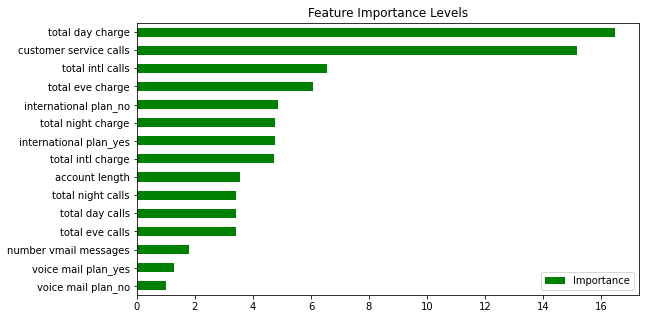

In [581]:
# provides a clear visual representation of the features that contribute most to the RF model's predictions
feature_importance =pd.DataFrame({"Importance": rf_model.feature_importances_*100},index = X_train_resampled.columns)
feature_importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

#### Observations : Feature Importance

The Top three features that most impact the customer churn feature are:
1. Total day charge
2. Customer Service calls
3. Total International calls

#### Conclusion

* Overall performance of the Random forest is better compared to the logistic regression and decision tree classifiers.
* Through hyperparameter tuning, the overall performance of the model has improved now with a recall 0.752 and precision of 0.817.

### Models Comparison

#### ROC Curve and AUC 

* ROC curve illustrates the true positive rate (recall) against the false positive rate of a classifier. AUC represents a measure of the overall ability of the classifier to distinguish between positive and negative classes.
* The higher the AUC, the better the performance. The best performing model will have an ROC that hugs the upper left corner of the graph, illustrating a high true positive rate and low false positive rate.

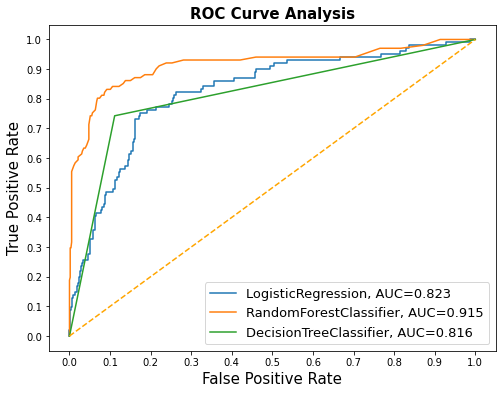

In [582]:

classifiers = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    yproba = model.predict_proba(X_test_full)[::,1]
    
    fpr, tpr, thresholds = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* From the ROC and AUC value illustrated above, the best performing model is the Random Forest Classifier. This model will best predict the customers about to leave the business.

## CONCLUSION

### Objective 1: 

#### Assess the Factors/Features Impacting Customer Churn:

**Conclusion:**
- **Findings:** Through feature analysis, the most impactful features on customer churn are: total day charge, customer service calls, international plan and total international calls.
- **Implications:** These features suggest that customers who feel overcharged, dissatisfied with international plans and unresolved issues leading to multiple customer service calls are the most likely to churn.

### Objective 2:
#### Suggest Proactive Measures to Reduce Customer Churn Rate:

**Conclusion:**
- **Findings:** An increase in customer service calls by a customer suggests that the customer is highly dissatisfied and likely to churn. An increase in total day charges, increases customer churn.
- **Implications:** Implement more effective and responsive customer service protocols to resolve customer complaints. Offer personalized subscriptions to customers as the daily charges increase. Improve international calls plan to boost customer satisfaction.

### Objective 3:
#### Develop a Classification Model to Predict SyriaTel's Customer Churn:

**Conclusion:**
- **Findings:** The tuned random forest classifier is the best model to predict customer churn, with an `AUC` score of `0.922` and an accuracy score of 93.7%.
- **Implications:** This random forest classifier can be used to predict when a customer is likely to churn based on multiple predictor variables. This will enable data-driven decisions to boost customer retention and targeted campaigns to improve customer satisfaction.

## Recommendations


1. **Focus on Boosting International Calls:**
   - Consider offering more tailored or flexible international plans that better match customer needs, possibly with options for additional benefits or reduced rates.

2. **Enhance Customer Support:**
   - Monitor customers who frequently contact support and proactively reach out to them to resolve potential issues before they escalate. Implement more effective and responsive customer service protocols.

3. **Use Data-Driven Insights to Target Dissatisfied Customers:**
   - Incorporate insights from predictive data analysis to come up with targeted campaigns for highly dissatisfied customers about to churn